## Validating the feature filter component

In [1]:
import torch
import numpy as np

from datasets.dataset import transform_dataset, kfold_dataset
from R2Ntab import train as train, R2Ntab
import matplotlib.pyplot as plt

In [2]:
dataset_names = ['adult', 'heloc', 'house', 'magic']
cancel_rates = [1e-2, 1e-4, 1e-6]
runs = 3

data = []
for dataset in dataset_names:
    print(dataset)
    dummy_features = 30

    X, Y, X_headers, Y_headers = transform_dataset(dataset, method='onehot-compare', negations=False, labels='binary', dummy_features=dummy_features)
    datasets = kfold_dataset(X, Y, shuffle=1)
    X_train, X_test, Y_train, Y_test = datasets[0]
    train_set = torch.utils.data.TensorDataset(torch.Tensor(X_train.to_numpy()), torch.Tensor(Y_train))
    test_set = torch.utils.data.TensorDataset(torch.Tensor(X_test.to_numpy()), torch.Tensor(Y_test))
    
    dummy_index = next(i for i, header in enumerate(X_headers) if 'dummy' in header)
    for cancel_rate in cancel_rates:
        print('  ', cancel_rate)
        run_data = []
        for run in range(runs):
            print('    ', run)
            net = R2Ntab(train_set[:][0].size(1), 50, 1)
            dummies = train(net, train_set, test_set=test_set, device='cpu', lr_cancel=5e-3, lr_rules=1e-2, epochs=1000, 
                      batch_size=400, and_lam=1e-2, cancel_lam=cancel_rate, or_lam=1e-5, num_alter=500, dummy_index=dummy_index)
            run_data.append(dummies)

        run_data = np.array(run_data)
        data.append(run_data.mean(axis=0))

adult
   0.01
     0


2023-06-14 12:24:23.323954: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-14 12:24:23.745790: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-14 12:24:23.747539: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 12:24:25.187058: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Epoch: 100%|██████████| 1000/1000 [05:02<00:00,  3.30it/s, rules cancelled=216, 


     1


Epoch: 100%|██████████| 1000/1000 [05:01<00:00,  3.32it/s, rules cancelled=215, 


     2


Epoch: 100%|██████████| 1000/1000 [05:03<00:00,  3.29it/s, rules cancelled=214, 


   0.0001
     0


Epoch: 100%|██████████| 1000/1000 [05:06<00:00,  3.26it/s, rules cancelled=141, 


     1


Epoch: 100%|██████████| 1000/1000 [05:22<00:00,  3.10it/s, rules cancelled=135, 


     2


Epoch: 100%|██████████| 1000/1000 [05:28<00:00,  3.04it/s, rules cancelled=137, 


   1e-06
     0


Epoch: 100%|██████████| 1000/1000 [05:15<00:00,  3.17it/s, rules cancelled=121, 


     1


Epoch: 100%|██████████| 1000/1000 [05:11<00:00,  3.21it/s, rules cancelled=102, 


     2


Epoch: 100%|██████████| 1000/1000 [05:11<00:00,  3.21it/s, rules cancelled=125, 


heloc
   0.01
     0


Epoch: 100%|██████████| 1000/1000 [01:49<00:00,  9.17it/s, rules cancelled=127, 


     1


Epoch: 100%|██████████| 1000/1000 [01:44<00:00,  9.56it/s, rules cancelled=133, 


     2


Epoch: 100%|██████████| 1000/1000 [01:46<00:00,  9.35it/s, rules cancelled=131, 


   0.0001
     0


Epoch: 100%|██████████| 1000/1000 [01:43<00:00,  9.65it/s, rules cancelled=101, 


     1


Epoch: 100%|██████████| 1000/1000 [01:44<00:00,  9.60it/s, rules cancelled=103, 


     2


Epoch: 100%|██████████| 1000/1000 [01:50<00:00,  9.02it/s, rules cancelled=102, 


   1e-06
     0


Epoch: 100%|██████████| 1000/1000 [01:52<00:00,  8.89it/s, rules cancelled=105, 


     1


Epoch: 100%|██████████| 1000/1000 [01:47<00:00,  9.31it/s, rules cancelled=100, 


     2


Epoch: 100%|██████████| 1000/1000 [01:49<00:00,  9.12it/s, rules cancelled=99, l


house
   0.01
     0


Epoch: 100%|██████████| 1000/1000 [03:48<00:00,  4.38it/s, rules cancelled=183, 


     1


Epoch: 100%|██████████| 1000/1000 [03:49<00:00,  4.37it/s, rules cancelled=173, 


     2


Epoch: 100%|██████████| 1000/1000 [03:43<00:00,  4.47it/s, rules cancelled=176, 


   0.0001
     0


Epoch: 100%|██████████| 1000/1000 [03:38<00:00,  4.58it/s, rules cancelled=138, 


     1


Epoch: 100%|██████████| 1000/1000 [03:39<00:00,  4.55it/s, rules cancelled=140, 


     2


Epoch: 100%|██████████| 1000/1000 [03:38<00:00,  4.57it/s, rules cancelled=142, 


   1e-06
     0


Epoch: 100%|██████████| 1000/1000 [03:40<00:00,  4.54it/s, rules cancelled=140, 


     1


Epoch: 100%|██████████| 1000/1000 [03:41<00:00,  4.52it/s, rules cancelled=141, 


     2


Epoch: 100%|██████████| 1000/1000 [03:40<00:00,  4.53it/s, rules cancelled=141, 


magic
   0.01
     0


Epoch: 100%|██████████| 1000/1000 [02:58<00:00,  5.60it/s, rules cancelled=152, 


     1


Epoch: 100%|██████████| 1000/1000 [02:58<00:00,  5.61it/s, rules cancelled=151, 


     2


Epoch: 100%|██████████| 1000/1000 [02:58<00:00,  5.60it/s, rules cancelled=151, 


   0.0001
     0


Epoch: 100%|██████████| 1000/1000 [02:57<00:00,  5.65it/s, rules cancelled=113, 


     1


Epoch: 100%|██████████| 1000/1000 [02:59<00:00,  5.56it/s, rules cancelled=113, 


     2


Epoch: 100%|██████████| 1000/1000 [02:58<00:00,  5.59it/s, rules cancelled=112, 


   1e-06
     0


Epoch: 100%|██████████| 1000/1000 [02:59<00:00,  5.56it/s, rules cancelled=109, 


     1


Epoch: 100%|██████████| 1000/1000 [02:58<00:00,  5.61it/s, rules cancelled=111, 


     2


Epoch: 100%|██████████| 1000/1000 [02:58<00:00,  5.60it/s, rules cancelled=111, 


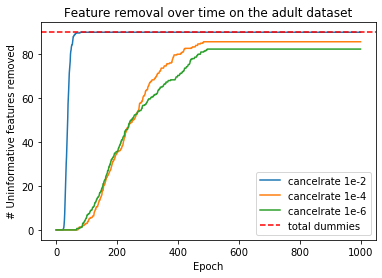

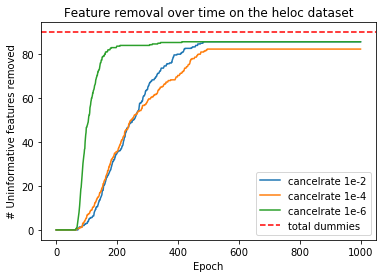

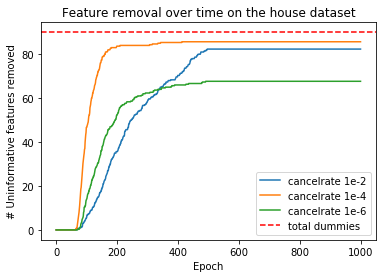

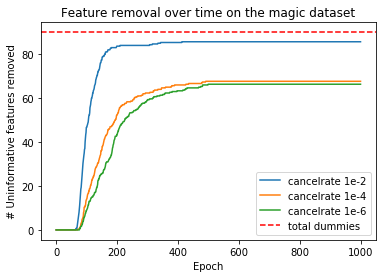

In [5]:
n_dummies = X_train.shape[1]-dummy_index
for index, dataset in enumerate(dataset_names): 
    plt.plot(data[index])
    plt.plot(data[index+1])
    plt.plot(data[index+2])
    plt.axhline(y=n_dummies, color='r', linestyle='dashed', label='total dummies')    
    plt.title(f"Feature removal over time on the {dataset} dataset")
    plt.ylabel("# Uninformative features removed")
    plt.xlabel("Epoch")
    plt.legend(['cancelrate 1e-2', 'cancelrate 1e-4', 'cancelrate 1e-6', 'total dummies'])
    plt.savefig(f'dummy_{dataset}.png')
    plt.show()